In [ ]:
import numpy as np 
import scipy.stats
import pandas as pd
import scanpy as sc
import goatools
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import matplotlib 
matplotlib.rc_file_defaults()

In [ ]:
def saveWithPickle(obj, PATH_out, filename="saveWithPickle"):
    import pickle
    with open(f'{PATH_out}/{filename}.pickle', 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def loadFromPickle(dir_pickle):
    import pickle
    with open(dir_pickle, 'rb') as handle:
        unserialized_pickle = pickle.load(handle)
    return unserialized_pickle

In [ ]:
adata = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.ManualAnnot.h5ad')

In [ ]:
dict_Identifier_to_lvl_1_CellType_1 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/B_and_T.lvl1.pickle')
dict_Identifier_to_lvl_1_CellType_2 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Mye_and_Epi.lvl1.pickle')
dict_Identifier_to_lvl_1_CellType_3 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Stromal.lvl1.pickle')

dict_Identifier_to_lvl_2_CellType_1 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/B_and_T.lvl2.pickle')
dict_Identifier_to_lvl_2_CellType_2 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Mye_and_Epi.lvl2.pickle')
dict_Identifier_to_lvl_2_CellType_3 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Stromal.lvl2.pickle')

dict_Identifier_to_lvl_1_CellType_Total,  dict_Identifier_to_lvl_2_CellType_Total = dict(), dict()

for k,v in dict_Identifier_to_lvl_1_CellType_1.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_1_CellType_2.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_1_CellType_3.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v

for k,v in dict_Identifier_to_lvl_2_CellType_1.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_2_CellType_2.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_2_CellType_3.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v

In [ ]:
temp = list()
for tup in adata.obs.itertuples():
    if tup.Manual_CellType_lvl_1 == 'N/A':
        temp.append( dict_Identifier_to_lvl_1_CellType_Total[tup.Identifier] )
    else:
        temp.append( tup.Manual_CellType_lvl_1 )

adata.obs['Manual_CellType_lvl_1'] = temp

temp = list()
for tup in adata.obs.itertuples():
    if tup.Manual_CellType_lvl_1 == 'Tumor epithelial':
        temp.append( tup.Manual_CellType_lvl_1 )
    else:
        temp.append( dict_Identifier_to_lvl_2_CellType_Total[tup.Identifier] )

adata.obs['Manual_CellType_lvl_2'] = temp

In [ ]:
temp = list()
for tup in adata.obs.itertuples():
    if tup.Manual_CellType_lvl_1 == 'N/A':
        temp.append( dict_Identifier_to_lvl_1_CellType_Total[tup.Identifier] )
    elif tup.Manual_CellType_lvl_1 == 'Normal epithelial':
        if tup.Manual_CellType_lvl_2 in ['Enterocytes', 'Enterocyte progenitors', 'Goblet', 'BEST4+ Enterocytes', 'Intestinal stem', 'Tuft', 'Enteroendocrine']:
            temp.append( 'Normal epithelial' )
        elif tup.Manual_CellType_lvl_2 in ['Fibroblast', 'SOX6+ Fibroblast', 'CXCL12- Fibroblast']:
            temp.append( 'Fibroblast' )
        elif tup.Manual_CellType_lvl_2 in ['IGHA+ Plasma']:
            temp.append( 'Plasma' )
        else:
            temp.append( 'N/A' )
    else:
        temp.append( tup.Manual_CellType_lvl_1 )

adata.obs['Manual_CellType_lvl_1'] = temp

temp = list()
for tup in adata.obs.itertuples():
    if tup.Manual_CellType_lvl_1 == 'Tumor epithelial':
        temp.append( tup.Manual_CellType_lvl_1 )
    else:
        temp.append( dict_Identifier_to_lvl_2_CellType_Total[tup.Identifier] )

adata.obs['Manual_CellType_lvl_2'] = temp

In [ ]:
sc.pl.umap(adata[adata.obs['Manual_CellType_lvl_1']=='Normal epithelial'], color=['Author_CellType_lvl_2', 'Manual_CellType_lvl_2'], ncols=1)

In [ ]:
adata_chen_tumorSamples  = adata[adata.obs['BiopsySite']=='Tumor'].copy()
adata_chen_normalSamples = adata[adata.obs['BiopsySite']!='Tumor'].copy()

In [ ]:
sc.pp.normalize_total(adata_chen_tumorSamples)
sc.pp.log1p(adata_chen_tumorSamples)
sc.pp.normalize_total(adata_chen_normalSamples)
sc.pp.log1p(adata_chen_normalSamples)

## T cell proportion

In [143]:
AuthorCellTypeLvl1_ProportionByPatient = list()

for PatientID, edf in adata_chen_tumorSamples[(adata_chen_tumorSamples.obs['Author_CellType_lvl_1']!='Epi')].obs.groupby('PatientID', observed=True,):
    for Author_CellType_lvl_1, edf2 in edf.groupby('Author_CellType_lvl_1', observed=True):
        AuthorCellTypeLvl1_ProportionByPatient.append( [PatientID, Author_CellType_lvl_1, len(edf2), len(edf2)/len(edf), edf.iloc[0].Response] )
        
AuthorCellTypeLvl1_ProportionByPatient = pd.DataFrame(AuthorCellTypeLvl1_ProportionByPatient, columns=['PatientID', 'Author_CellType_lvl_1', 'Count', 'Proportion', 'Response'])

dict_PatientID_to_AvgSTRDiff        = { PatientID : np.mean(edf['AvgSTRDiff']) for PatientID, edf in adata_chen_tumorSamples.obs[(adata_chen_tumorSamples.obs['Manual_CellType_lvl_2']=='Tumor epithelial')].groupby('PatientID', observed=True) }
dict_PatientID_to_TumorCellCount    = { PatientID : len(edf) for PatientID, edf in adata_chen_tumorSamples.obs[(adata_chen_tumorSamples.obs['Manual_CellType_lvl_2']=='Tumor epithelial')].groupby('PatientID', observed=True) }


AuthorCellTypeLvl1_ProportionByPatient['MSI_intensity'] = [ dict_PatientID_to_AvgSTRDiff[PID] for PID in AuthorCellTypeLvl1_ProportionByPatient['PatientID'] ]
AuthorCellTypeLvl1_ProportionByPatient['TumorCellCount'] = [ dict_PatientID_to_TumorCellCount[PID] for PID in AuthorCellTypeLvl1_ProportionByPatient['PatientID'] ]
AuthorCellTypeLvl1_ProportionByPatient['PerTumorCell'] = [ tup.Count/tup.TumorCellCount for tup in AuthorCellTypeLvl1_ProportionByPatient.itertuples() ]

PearsonRResult(statistic=-0.5692337473244177, pvalue=0.08588839344562071)

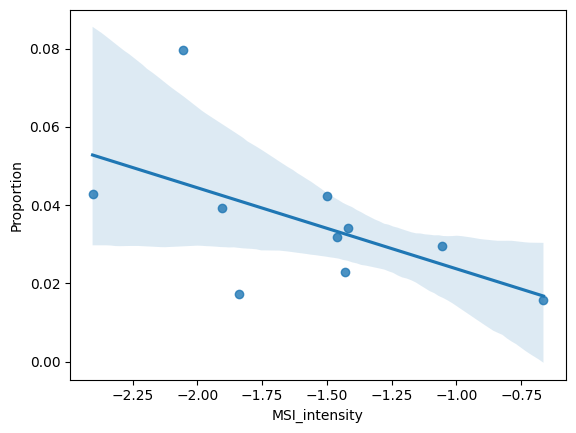

In [152]:
chen_patient_order_by_MSI_intensity     = ['P18', 'P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']
AuthorCellTypeLvl1_ProportionByPatient_oi = AuthorCellTypeLvl1_ProportionByPatient[(AuthorCellTypeLvl1_ProportionByPatient['Author_CellType_lvl_1']=='B') & 
                                                                                   ~(AuthorCellTypeLvl1_ProportionByPatient['PatientID'].isin(['P18', 'P21', 'P23']))]
AuthorCellTypeLvl1_ProportionByPatient_oi = AuthorCellTypeLvl1_ProportionByPatient[(AuthorCellTypeLvl1_ProportionByPatient['Author_CellType_lvl_1']=='T') ]
sns.regplot(data=AuthorCellTypeLvl1_ProportionByPatient_oi, x='MSI_intensity', y='Proportion',
            # order=chen_patient_order_by_MSI_intensity,
            )

scipy.stats.pearsonr( x=AuthorCellTypeLvl1_ProportionByPatient_oi['MSI_intensity'], y=AuthorCellTypeLvl1_ProportionByPatient_oi['Proportion'] )

In [155]:
AuthorCellTypeLvl2_ProportionByPatient = list()

for PatientID, edf in adata_chen_tumorSamples[(adata_chen_tumorSamples.obs['Author_CellType_lvl_1']!='Epi')].obs.groupby('PatientID', observed=True,):
    for Author_CellType_lvl_2, edf2 in edf.groupby('Author_CellType_lvl_2', observed=True):
        AuthorCellTypeLvl2_ProportionByPatient.append( [PatientID, Author_CellType_lvl_2, edf2.iloc[0].Author_CellType_lvl_1, len(edf2), len(edf2)/len(edf), edf.iloc[0].Response] )
        
AuthorCellTypeLvl2_ProportionByPatient = pd.DataFrame(AuthorCellTypeLvl2_ProportionByPatient, columns=['PatientID', 'Author_CellType_lvl_2', 'Author_CellType_lvl_1', 'Count', 'Proportion', 'Response'])

AuthorCellTypeLvl2_ProportionByPatient['MSI_intensity'] = [ dict_PatientID_to_AvgSTRDiff[PID] for PID in AuthorCellTypeLvl2_ProportionByPatient['PatientID'] ]
AuthorCellTypeLvl2_ProportionByPatient['TumorCellCount'] = [ dict_PatientID_to_TumorCellCount[PID] for PID in AuthorCellTypeLvl2_ProportionByPatient['PatientID'] ]
AuthorCellTypeLvl2_ProportionByPatient['PerTumorCell'] = [ tup.Count/tup.TumorCellCount for tup in AuthorCellTypeLvl2_ProportionByPatient.itertuples() ]

In [176]:
dict_CT_to_Cor = dict()
for Author_CellType_lvl_2, edf in AuthorCellTypeLvl2_ProportionByPatient.groupby('Author_CellType_lvl_2', observed=True):
    try:
        dict_CT_to_Cor[Author_CellType_lvl_2] = (scipy.stats.pearsonr( x=edf['MSI_intensity'], y=edf['Proportion'] )[0], scipy.stats.pearsonr( x=edf['MSI_intensity'], y=edf['Proportion'] )[1])
    except ValueError:
        dict_CT_to_Cor[Author_CellType_lvl_2] = ( None, None )
        
AuthorCellTypeLvl2_ProportionByPatient['r'] = [ dict_CT_to_Cor[Author_CellType_lvl_2][0] for Author_CellType_lvl_2 in AuthorCellTypeLvl2_ProportionByPatient['Author_CellType_lvl_2'] ]
AuthorCellTypeLvl2_ProportionByPatient['p'] = [ dict_CT_to_Cor[Author_CellType_lvl_2][1] for Author_CellType_lvl_2 in AuthorCellTypeLvl2_ProportionByPatient['Author_CellType_lvl_2'] ]

PearsonRResult(statistic=0.6888515060139784, pvalue=0.02759208035773045)

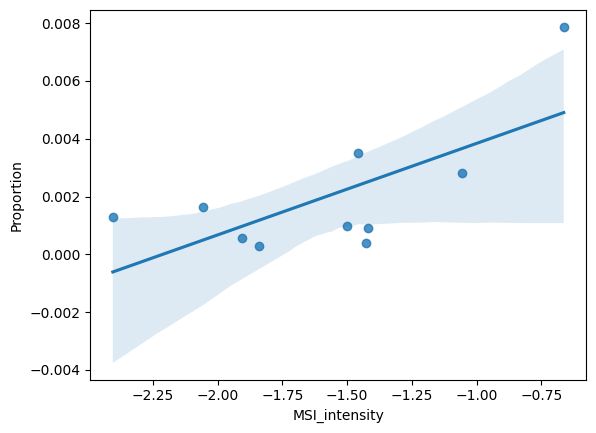

In [183]:


chen_patient_order_by_MSI_intensity     = ['P18', 'P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']
AuthorCellTypeLvl2_ProportionByPatient_oi = AuthorCellTypeLvl2_ProportionByPatient[(AuthorCellTypeLvl2_ProportionByPatient['Author_CellType_lvl_1']=='B') & 
                                                                                   ~(AuthorCellTypeLvl2_ProportionByPatient['PatientID'].isin(['P18', 'P21', 'P23']))]
AuthorCellTypeLvl2_ProportionByPatient_oi = AuthorCellTypeLvl2_ProportionByPatient[(AuthorCellTypeLvl2_ProportionByPatient['Author_CellType_lvl_2']=='c17_CD8_Tcm_GPR183') ]
sns.regplot(data=AuthorCellTypeLvl2_ProportionByPatient_oi, x='MSI_intensity', y='Proportion',
            # order=chen_patient_order_by_MSI_intensity,
            )

scipy.stats.pearsonr( x=AuthorCellTypeLvl2_ProportionByPatient_oi.sort_values('MSI_intensity')['MSI_intensity'], y=AuthorCellTypeLvl2_ProportionByPatient_oi.sort_values('MSI_intensity')['Proportion'] )

## CD8+ T cells

In [ ]:
adata_chen_tumorSamples.obs.columns

In [ ]:
sns.countplot(data=adata_chen_tumorSamples[(adata_chen_tumorSamples.obs['MSI']=='MSI') & 
                                      (adata_chen_tumorSamples.obs['Manual_CellType_lvl_1']=='Tumor epithelial')].obs , y='PatientID')

In [ ]:
sc.pl.dotplot(adata_chen_tumorSamples[(adata_chen_tumorSamples.obs['MSI']=='MSI') & 
                                      (adata_chen_tumorSamples.obs['Manual_CellType_lvl_1']!='Tumor epithelial')], var_names=['HLA-A', 'HLA-B', 'HLA-C', 'B2M', 'TAP1', 'TAP2'], groupby='PatientID')

In [ ]:
sc.pl.dotplot(adata_chen_tumorSamples[(adata_chen_tumorSamples.obs['MSI']=='MSI') & 
                                      (adata_chen_tumorSamples.obs['Manual_CellType_lvl_1']=='Tumor epithelial')], var_names=['HLA-A', 'HLA-B', 'HLA-C', 'B2M', 'TAP1', 'TAP2'], groupby='PatientID')

In [ ]:
set(adata.obs['Author_CellType_lvl_1'])

In [ ]:
set(adata_chen_tumorSamples[adata_chen_tumorSamples.obs['Author_CellType_lvl_1']=='T'].obs['Author_CellType_lvl_2'])

In [ ]:
CTOI = [ CT for CT in set(adata_chen_tumorSamples[adata_chen_tumorSamples.obs['Author_CellType_lvl_1']=='T'].obs['Author_CellType_lvl_2']) if 'CD8_' in CT ]

In [ ]:
adata_chen_tumorSamples_CD8T = adata_chen_tumorSamples[(adata_chen_tumorSamples.obs['Manual_CellType_lvl_2']=='CD8+ T') & 
                                                             (adata_chen_tumorSamples.obs['MSI']=='MSI') & 
                                                             (adata_chen_tumorSamples.obs['PatientID'].isin(['P04', 'P15', 'P17', 'P19', 'P20', 'P22', 'P26']))].copy()

adata_chen_tumorSamples_CD8T = adata_chen_tumorSamples[(adata_chen_tumorSamples.obs['Author_CellType_lvl_1'].isin(['T'])) & 
                                                             (adata_chen_tumorSamples.obs['MSI']=='MSI') & 
                                                             (adata_chen_tumorSamples.obs['PatientID'].isin(['P04', 'P15', 'P17', 'P19', 'P20', 'P22', 'P26']))].copy()
adata_chen_tumorSamples_CD8T = adata_chen_tumorSamples_CD8T.raw.to_adata()  # 18 21 23
sc.pp.normalize_total(adata_chen_tumorSamples_CD8T)
sc.pp.log1p(adata_chen_tumorSamples_CD8T)
adata_chen_tumorSamples_CD8T

In [ ]:
activation_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM', 'PRF1']
naive_genes = ['CCR7', 'SELL', 'IL7R', 'LEF1', 'TCF7']

# cytotoxic_genes = ['HAVCR2', 'LAYN', 'LAG3', 'GZMA', 'GZMB', 'FASLG', 'GNLY', 'ENTPD1', 'NKG7', ]
# native_genes    = ['SELL', 'CCR7', 'IL7R', 'TCF7', 'LEF1',]

sc.tl.score_genes(adata_chen_tumorSamples_CD8T, gene_list=activation_genes, score_name='CytotoxicScore')
sc.tl.score_genes(adata_chen_tumorSamples_CD8T, gene_list=naive_genes, score_name='NativeScore')

In [ ]:
chen_patient_order_by_MSI_intensity     = ['P18', 'P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']
chen_patient_order_by_MSI_intensity_P18 = ['P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']
chen_patient_order_by_MSI_intensity_AC  = ['P26', 'P20', 'P21', 'P04']
chen_patient_order_by_MSI_intensity_TC  = ['P19', 'P22', 'P23',]
chen_patient_order_by_MSI_intensity_SC  = ['P18', 'P17', 'P15']

In [ ]:
chen_patient_metadata = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/Immunotherapy_CRC_Chen_et_al/metadata/Chen_et_al.patient_meta.csv',)
chen_patient_metadata = chen_patient_metadata[(chen_patient_metadata['Cancer Type'] == 'CRC') & 
                                            (chen_patient_metadata['MSI/MSS']=='MSI') & 
                                            (chen_patient_metadata['Response']!='SD') & 
                                            ~(chen_patient_metadata['Patient ID'].isin(['P08', 'P12']))].reset_index(drop=True)
dict_PatientID_to_TumorLocation = { list(tup)[1] : list(tup)[-3] for tup in chen_patient_metadata.itertuples() }
adata_chen_tumorSamples_CD8T.obs['TumorLocation'] = [ dict_PatientID_to_TumorLocation[PID] for PID in adata_chen_tumorSamples_CD8T.obs['PatientID'] ]

In [ ]:
sns.barplot(data=adata_chen_tumorSamples_CD8T.obs, x='PatientID', y='CytotoxicScore', hue='TumorLocation', order=['P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P04'])

In [ ]:
sc.pl.matrixplot(adata_chen_tumorSamples_CD8T, 
                 var_names=['CytotoxicScore', 'NativeScore'], 
                 groupby='PatientID',
                 categories_order=['P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P04'], 
                 swap_axes=False, 
                 standard_scale='var',
                 cmap='Blues',
                 )